In [1]:
import numpy as np
from test import test
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize
from stats import *

In [2]:
topics = np.array([[-1, 1]])

In [3]:
varied_param = 'init_topic_produced_method'
varied_param_legend_label = 'Producer Topic Produced Initialization'
varied_param_x_label = 'Producer Topic Produced Initialization'

In [4]:
num_influencers = 1
num_agents = 10

methods = ['main', 'center', 'opposite', 'farthest', 'random']
varied_param_values = [1, 2, 3, 4, 5]

In [5]:
test_imperfect = True

In [6]:
perfect_info_stats, imperfect_info_stats = test(
    topics=topics,
    varied_param=varied_param,
    num_influencers=num_influencers,
    num_agents=num_agents,
    producer_topic_interest_func=None,
    consumer_topic_interest_func=None,
    agent_topic_interest_func=lambda x: inverse_decay(x, 0.75, 2),
    consumer_attention_bound=20,
    consumer_external_interest_prob=3,
    consumer_delay_sensitivity=1,
    delay_sensitivity=None,
    influencer_attention_bound=40,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    init_topic_produced_method=methods,
    production_rate=1,
    external_production_rate=1,
    use_imperfect_information=test_imperfect,
    basinhop=True
)

Optimizing consumer 0


Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing influencer 10
Optimizing producer 0
Optimization succeeded (overall 0.4258899169508368s): nit=100, nfev=1324, njev=662.
Optimizing producer 1
Optimization succeeded (overall 0.43598670803476125s): nit=100, nfev=1290, njev=645.
Optimizing producer 2
Optimization succeeded (overall 0.44952212495263666s): nit=100, nfev=1256, njev=628.
Optimizing producer 3
Optimization succeeded (overall 0.39823349996004254s): nit=100, nfev=1226, njev=613.
Optimizing producer 4
Optimization succeeded (overall 0.3988994579995051s): nit=100, nfev=1182, njev=591.
Optimizing producer 5
Optimization succeeded (overall 0.3884903339203447s): nit=100, nfev=1168, njev=584.
Optimizing producer 6
Optimization succeeded (overall 0.38959633302874863s): nit=100, nfev=1220, njev=610.
Optimizing producer 7
Optimizat

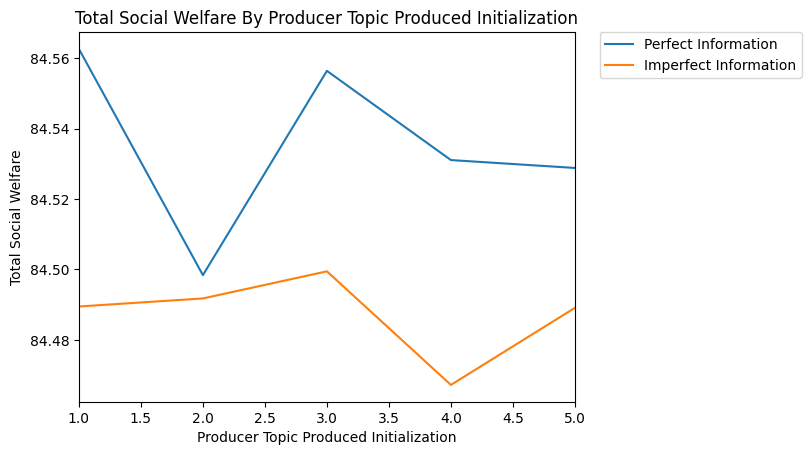

In [7]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'total_social_welfare', varied_param_values, varied_param_x_label, 'Total Social Welfare')

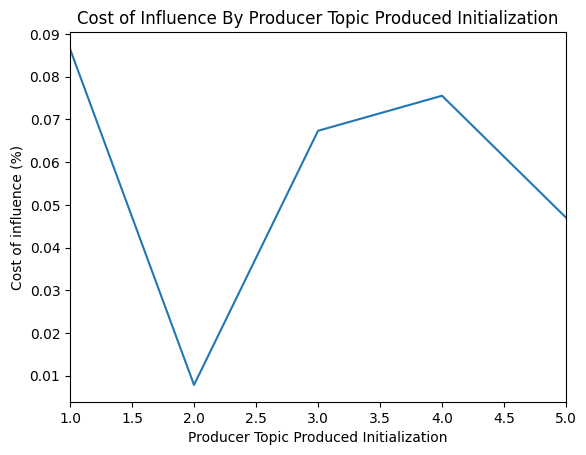

In [8]:
visualize.plot_cost_of_influence_by_test(f"Cost of Influence By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, varied_param_values, varied_param_x_label, 'Cost of Influence')

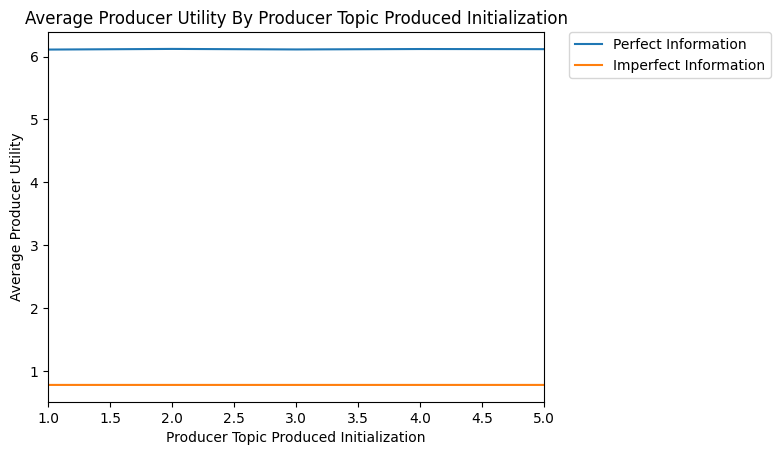

In [9]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_producer_utility', varied_param_values, varied_param_x_label, 'Average Producer Utility')

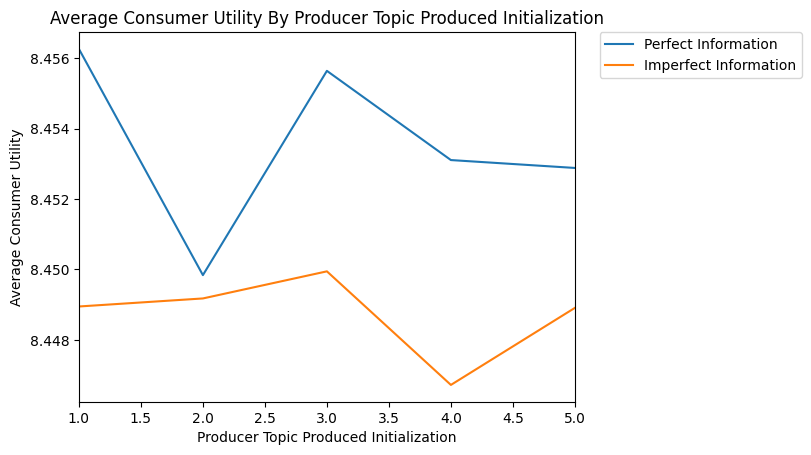

In [10]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_consumer_utility', varied_param_values, varied_param_x_label, 'Average Consumer Utility')

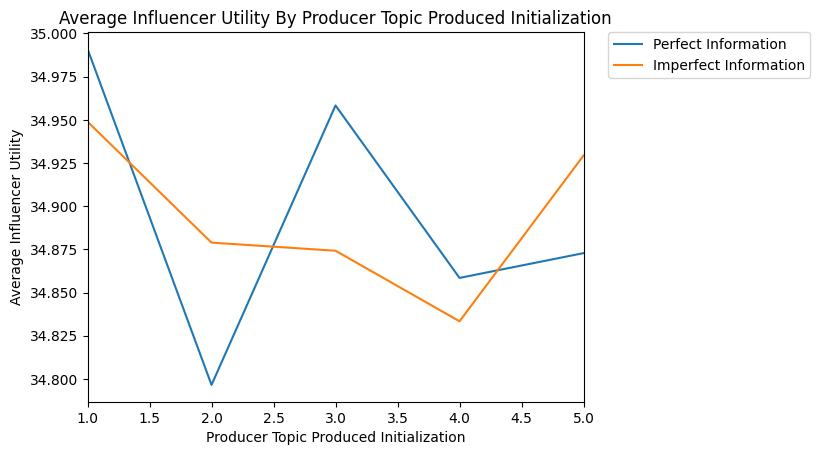

In [11]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_utility', varied_param_values, varied_param_x_label, 'Average Influencer Utility')

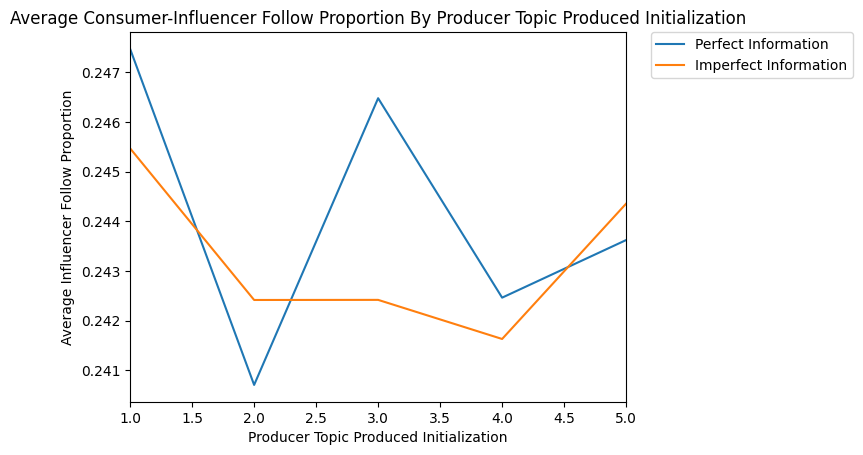

In [12]:
visualize.plot_ending_value_by_test(f"Average Consumer-Influencer Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_follow_proportion', varied_param_values, varied_param_x_label, 'Average Influencer Follow Proportion')

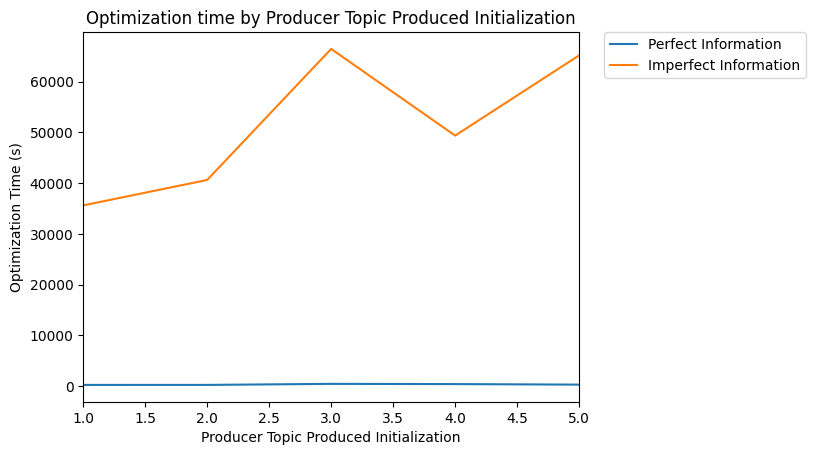

In [13]:
visualize.plot_value_by_test(f"Optimization time by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'optimization_time', varied_param_values, varied_param_x_label, 'Optimization Time (s)')

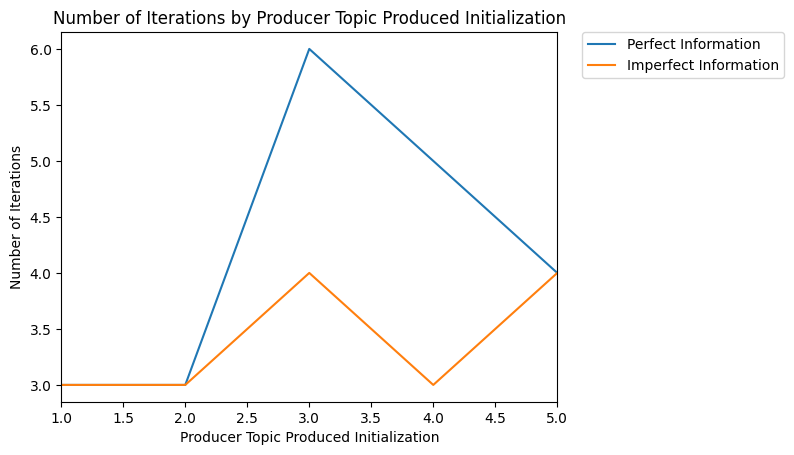

In [14]:
visualize.plot_value_by_test(f"Number of Iterations by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'num_iterations', varied_param_values, varied_param_x_label, 'Number of Iterations')

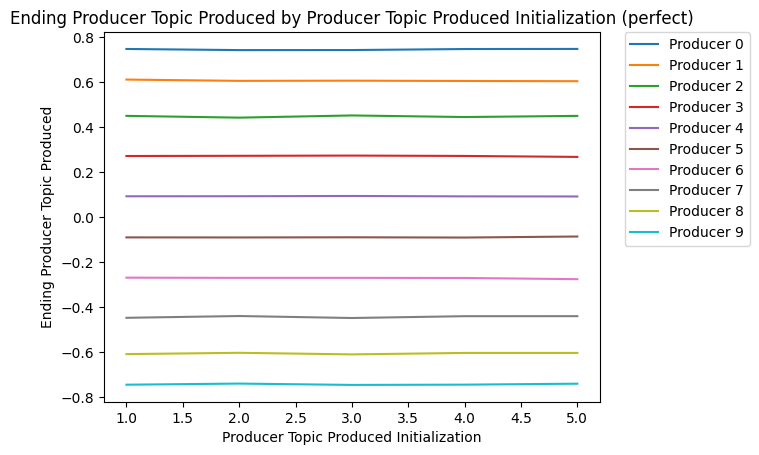

In [15]:
plt.figure()
plt.title(f'Ending Producer Topic Produced by {varied_param_x_label} (perfect)')
plt.xlabel(varied_param_x_label)
plt.ylabel('Ending Producer Topic Produced')
topics_produced = {}
for i in range(len(varied_param_values)):
    stat = perfect_info_stats[i]
    producer_stats = stat.producer_stats
    for index, producer_stat in producer_stats.items():
        if topics_produced.get(index) is None:
            topics_produced[index] = []
        topics_produced[index].append(producer_stat.topics[-1])

for index, topic_produced in topics_produced.items():
    plt.plot(varied_param_values, topic_produced, label=f'Producer {index}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

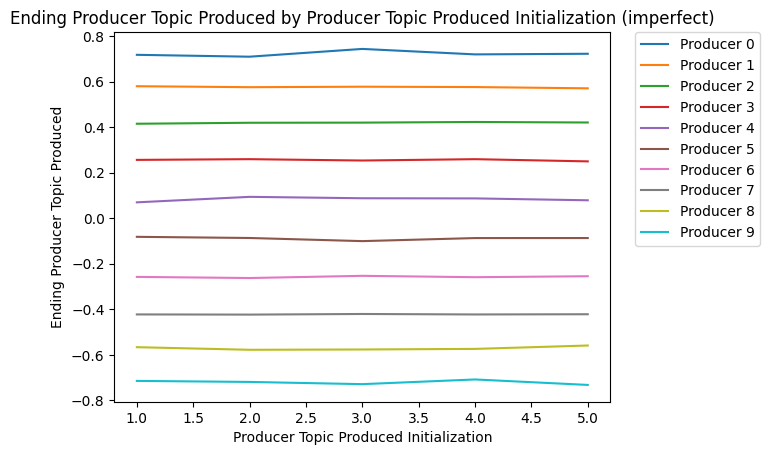

In [16]:
if test_imperfect:
    plt.figure()
    plt.title(f'Ending Producer Topic Produced by {varied_param_x_label} (imperfect)')
    plt.xlabel(varied_param_x_label)
    plt.ylabel('Ending Producer Topic Produced')
    topics_produced = {}
    for i in range(len(varied_param_values)):
        stat = imperfect_info_stats[i]
        producer_stats = stat.producer_stats
        for index, producer_stat in producer_stats.items():
            if topics_produced.get(index) is None:
                topics_produced[index] = []
            topics_produced[index].append(producer_stat.topics[-1])

    for index, topic_produced in topics_produced.items():
        plt.plot(varied_param_values, topic_produced, label=f'Producer {index}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

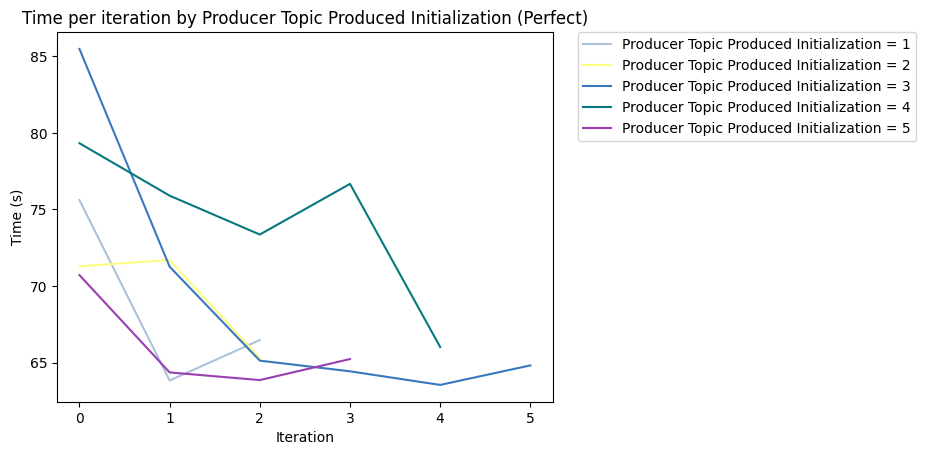

In [17]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Perfect)", perfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

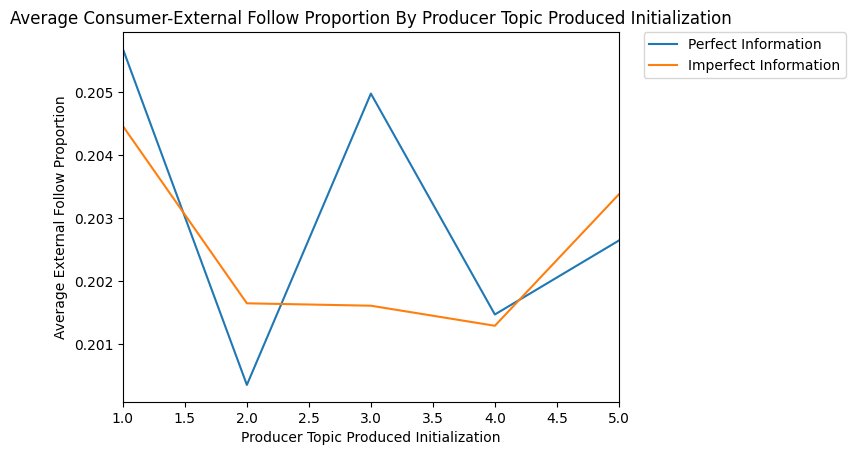

In [18]:
visualize.plot_ending_value_by_test(f"Average Consumer-External Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_external_follow_proportion', varied_param_values, varied_param_x_label, 'Average External Follow Proportion')

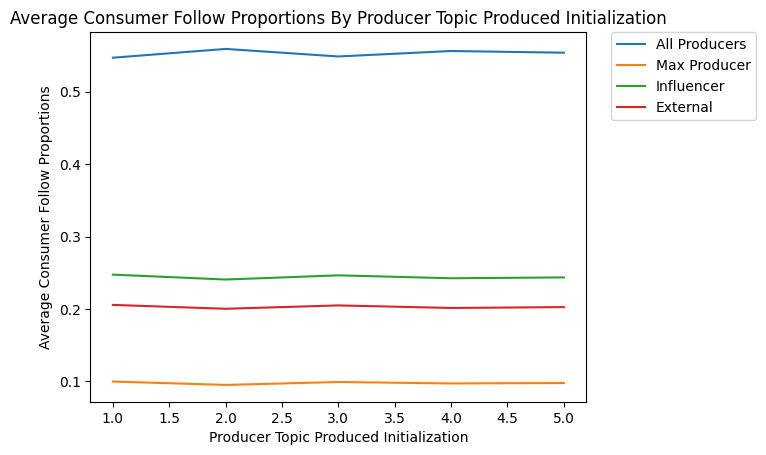

In [19]:
plt.figure()
plt.title(f'Average Consumer Follow Proportions By {varied_param_x_label}')
plt.xlabel(varied_param_x_label)
plt.ylabel('Average Consumer Follow Proportions')
avg_producer_proportions = []
avg_max_producer_proportions = []
avg_influencer_proportions = []
avg_external_proportions = []
for i in range(len(varied_param_values)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_producer_proportion = 0
    avg_max_producer_proportion = 0
    avg_influencer_proportion = 0
    avg_external_proportion = 0
    for consumer in perfect_stat.consumer_stats.values():
        avg_producer_proportion += sum(consumer.following_rates[-1][:-2]) / consumer.agent.attention_bound
        avg_max_producer_proportion += np.max(consumer.following_rates[-1][:-2]) / consumer.agent.attention_bound
        avg_influencer_proportion += consumer.following_rates[-1][-2] / consumer.agent.attention_bound
        avg_external_proportion += consumer.following_rates[-1][-1] / consumer.agent.attention_bound
    avg_producer_proportion /= len(perfect_stat.consumer_stats)
    avg_max_producer_proportion /= len(perfect_stat.consumer_stats)
    avg_influencer_proportion /= len(perfect_stat.consumer_stats)
    avg_external_proportion /= len(perfect_stat.consumer_stats)

    avg_producer_proportions.append(avg_producer_proportion)
    avg_max_producer_proportions.append(avg_max_producer_proportion)
    avg_influencer_proportions.append(avg_influencer_proportion)
    avg_external_proportions.append(avg_external_proportion)
plt.plot(varied_param_values, avg_producer_proportions, label='All Producers')
plt.plot(varied_param_values, avg_max_producer_proportions, label='Max Producer')
plt.plot(varied_param_values, avg_influencer_proportions, label='Influencer')
plt.plot(varied_param_values, avg_external_proportions, label='External')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

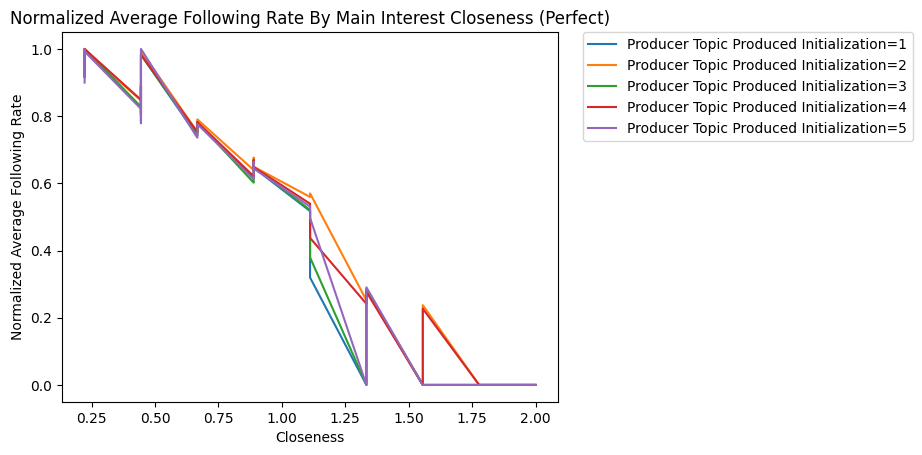

In [20]:
plt.figure()
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_rate_by_main_interest_closeness = perfect_stat.average_following_rate_by_main_interest_closeness
    if len(avg_rate_by_main_interest_closeness) == 0:
        continue
    closenesses = [x[0] for x in avg_rate_by_main_interest_closeness]
    rates = [x[1] for x in avg_rate_by_main_interest_closeness]
    min_rate = min(rates)
    max_rate = max(rates)
    rates = [(x - min_rate) / (max_rate - min_rate) for x in rates]
    plt.plot(closenesses, rates, label=f"{varied_param_legend_label}={varied_param_values[i]}")
plt.title(f"Normalized Average Following Rate By Main Interest Closeness (Perfect)")
plt.xlabel("Closeness")
plt.ylabel("Normalized Average Following Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

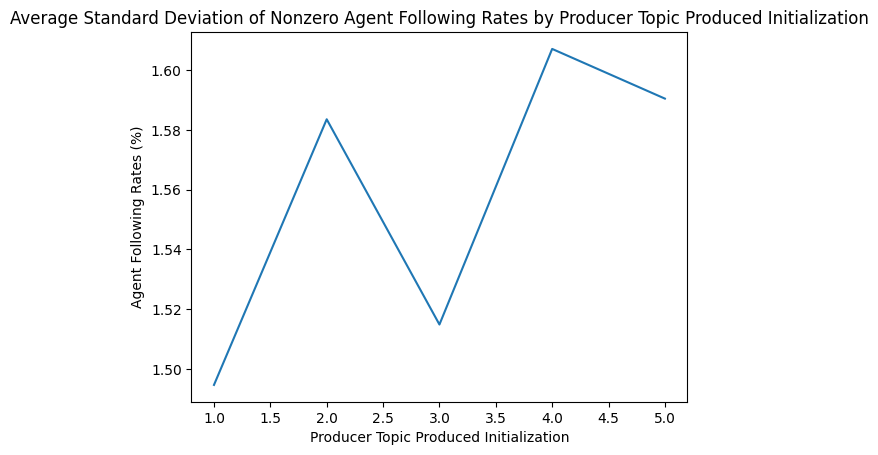

In [21]:
plt.figure()
plt.title(f'Average Standard Deviation of Nonzero Agent Following Rates by {varied_param_x_label}')
plt.xlabel(varied_param_x_label)
plt.ylabel('Agent Following Rates (%)')
average_standard_deviations = []
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_standard_deviation = 0
    for index in perfect_stat.consumer_stats:
        stat = perfect_stat.consumer_stats[index]
        following_rate = [x / stat.agent.attention_bound * 100 for x in stat.following_rates[-1][:-2] if x > 1e-3]
        if len(following_rate) == 0:
            continue
        avg_standard_deviation += np.std(following_rate)
    average_standard_deviations.append(avg_standard_deviation / len(perfect_stat.consumer_stats))
plt.plot(varied_param_values, average_standard_deviations)
plt.show()

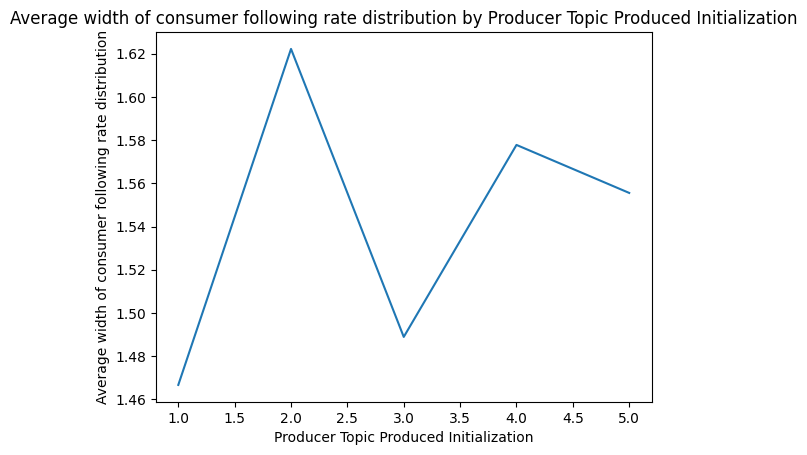

In [22]:
plt.figure()
plt.title(f'Average width of consumer following rate distribution by {varied_param_x_label}')
plt.xlabel(varied_param_x_label)
plt.ylabel('Average width of consumer following rate distribution')
average_widths = []
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_width = 0
    for index in perfect_stat.consumer_stats:
        stat = perfect_stat.consumer_stats[index]
        following_rate = [x for x in stat.following_rates[-1][:-2]]
        min_nonzero_index = 0
        max_nonzero_index = len(following_rate) - 1
        while following_rate[min_nonzero_index] < 1e-3 and min_nonzero_index < len(following_rate) - 1:
            min_nonzero_index += 1
        while following_rate[max_nonzero_index] < 1e-3 and max_nonzero_index > 0:
            max_nonzero_index -= 1
        if min_nonzero_index > max_nonzero_index:
            continue
        avg_width += np.linalg.norm(perfect_stat.producer_stats[max_nonzero_index].agent.main_interest - perfect_stat.producer_stats[min_nonzero_index].agent.main_interest)
    average_widths.append(avg_width / len(perfect_stat.consumer_stats))
plt.plot(varied_param_values, average_widths)
plt.show()

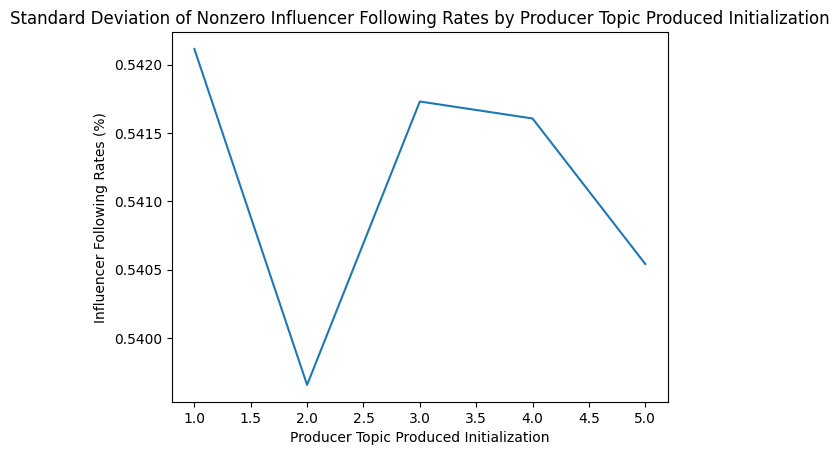

In [23]:
plt.figure()
plt.title(f'Standard Deviation of Nonzero Influencer Following Rates by {varied_param_x_label}')
plt.xlabel(varied_param_x_label)
plt.ylabel('Influencer Following Rates (%)')
standard_deviations = []
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    influencer_stat = [x for x in perfect_stat.influencer_stats.values()][0]
    following_rate = [x / influencer_stat.agent.attention_bound * 100 for x in influencer_stat.following_rates[-1][:-2] if x > 1e-3]
    standard_deviations.append(np.std(following_rate))
plt.plot(varied_param_values, standard_deviations)
plt.show()

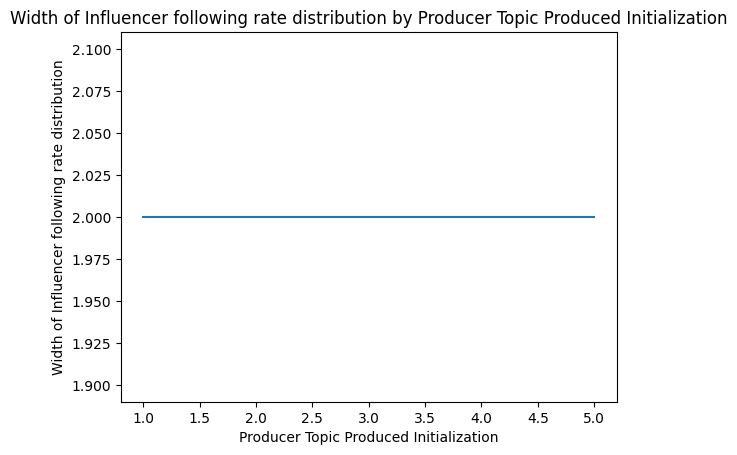

In [24]:
plt.figure()
plt.title(f'Width of Influencer following rate distribution by {varied_param_x_label}')
plt.xlabel(varied_param_x_label)
plt.ylabel('Width of Influencer following rate distribution')
widths = []
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    width = 0
    stat = [x for x in perfect_stat.influencer_stats.values()][0]
    following_rate = [x for x in stat.following_rates[-1][:-2]]
    min_nonzero_index = 0
    max_nonzero_index = len(following_rate) - 1
    while following_rate[min_nonzero_index] < 1e-3 and min_nonzero_index < len(following_rate) - 1:
        min_nonzero_index += 1
    while following_rate[max_nonzero_index] < 1e-3 and max_nonzero_index > 0:
        max_nonzero_index -= 1
    if min_nonzero_index > max_nonzero_index:
            continue
    width = np.linalg.norm(perfect_stat.producer_stats[max_nonzero_index].agent.main_interest - perfect_stat.producer_stats[min_nonzero_index].agent.main_interest)
    widths.append(width)
plt.plot(varied_param_values, widths)
plt.show()

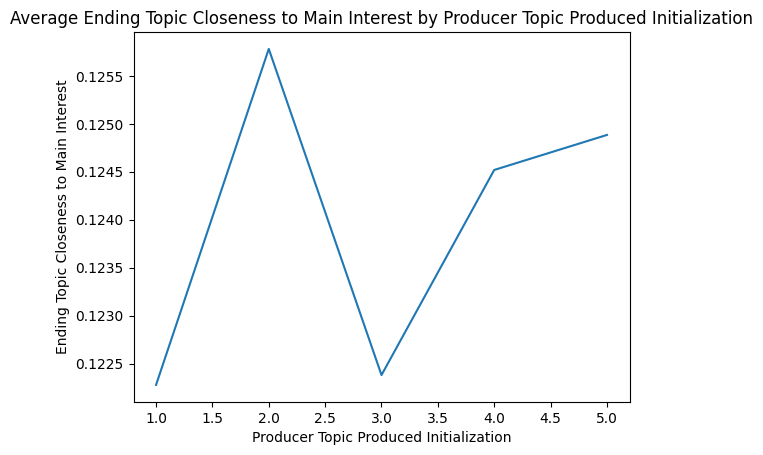

In [25]:
plt.figure()
plt.title(f'Average Ending Topic Closeness to Main Interest by {varied_param_x_label}')
plt.xlabel(varied_param_x_label)
plt.ylabel('Ending Topic Closeness to Main Interest')
ending_closenesses = []
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_closeness = 0
    for producer_stat in perfect_stat.producer_stats.values():
        avg_closeness += np.linalg.norm(producer_stat.agent.main_interest - producer_stat.agent.topic_produced)
    avg_closeness /= len(perfect_stat.producer_stats)
    ending_closenesses.append(avg_closeness)
plt.plot(varied_param_values, ending_closenesses)
plt.show()

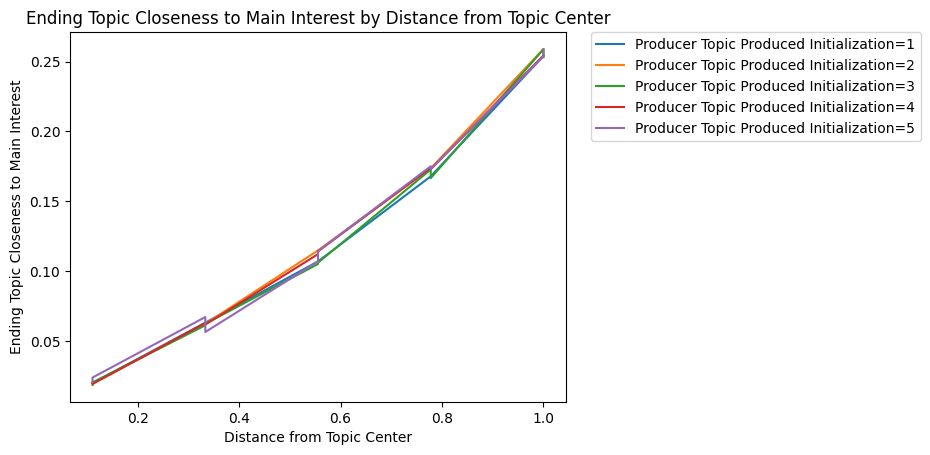

In [26]:
plt.figure()
plt.title("Ending Topic Closeness to Main Interest by Distance from Topic Center")
plt.xlabel("Distance from Topic Center")
plt.ylabel("Ending Topic Closeness to Main Interest")
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    topic_center = np.mean(perfect_stat.producer_stats[0].agent.market.topics_bounds, axis=1)
    closenesses = []
    distances = []

    producers = sorted(perfect_stat.producer_stats.values(), key=lambda x: np.linalg.norm(x.agent.main_interest - topic_center))
    for producer_stat in producers:
        distances.append(np.linalg.norm(producer_stat.agent.main_interest - topic_center))
        closenesses.append(np.linalg.norm(producer_stat.agent.main_interest - producer_stat.agent.topic_produced))
    plt.plot(distances, closenesses, label=f"{varied_param_legend_label}={varied_param_values[i]}")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


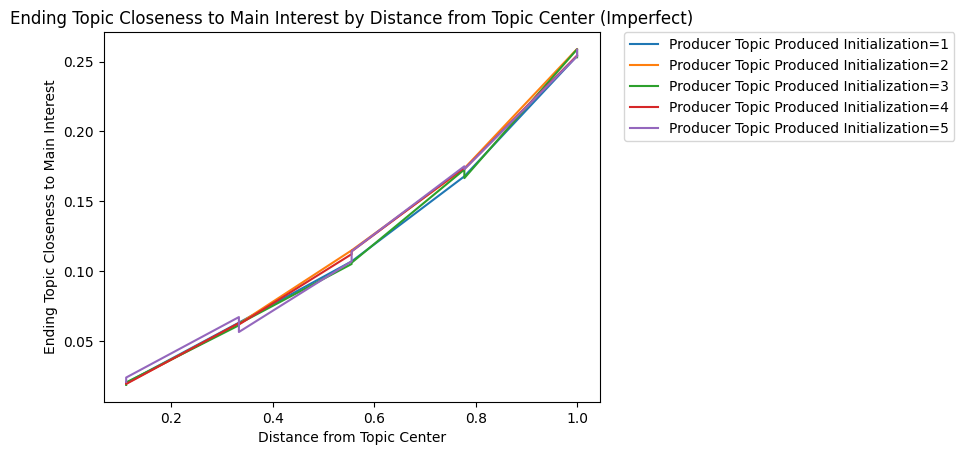

In [27]:
if test_imperfect:
    plt.figure()
    plt.title("Ending Topic Closeness to Main Interest by Distance from Topic Center (Imperfect)")
    plt.xlabel("Distance from Topic Center")
    plt.ylabel("Ending Topic Closeness to Main Interest")
    for i in range(len(imperfect_info_stats)):
        imperfect_stat: TestStats = perfect_info_stats[i]
        topic_center = np.mean(imperfect_stat.producer_stats[0].agent.market.topics_bounds, axis=1)
        closenesses = []
        distances = []

        producers = sorted(imperfect_stat.producer_stats.values(), key=lambda x: np.linalg.norm(x.agent.main_interest - topic_center))
        for producer_stat in producers:
            distances.append(np.linalg.norm(producer_stat.agent.main_interest - topic_center))
            closenesses.append(np.linalg.norm(producer_stat.agent.main_interest - producer_stat.agent.topic_produced))
        plt.plot(distances, closenesses, label=f"{varied_param_legend_label}={varied_param_values[i]}")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()


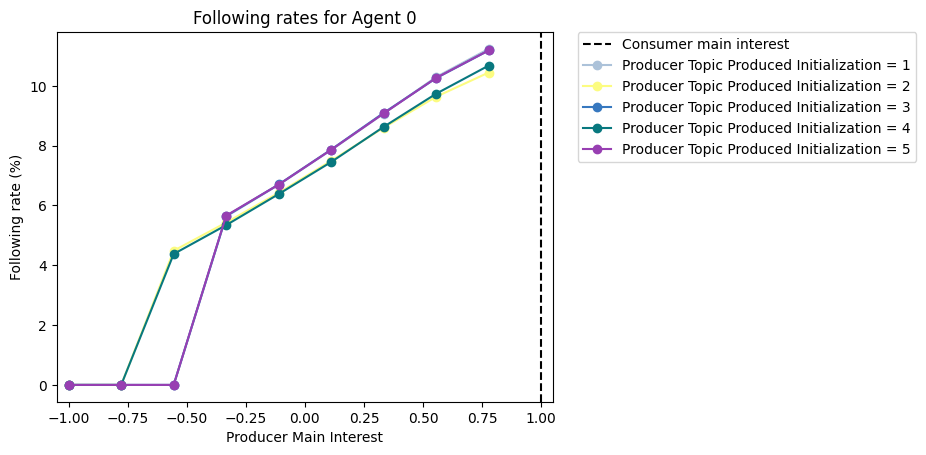

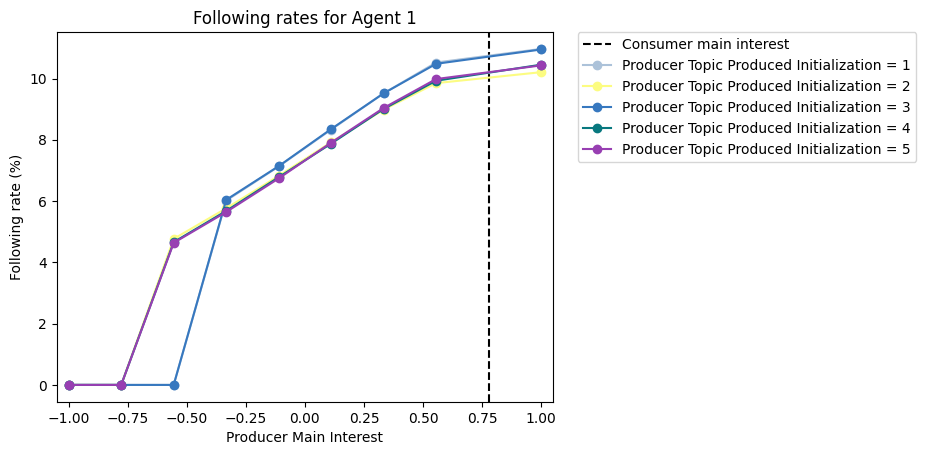

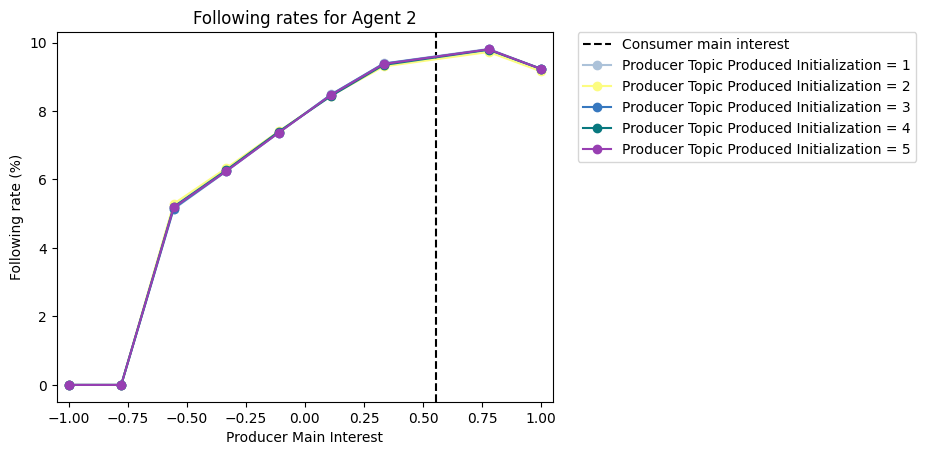

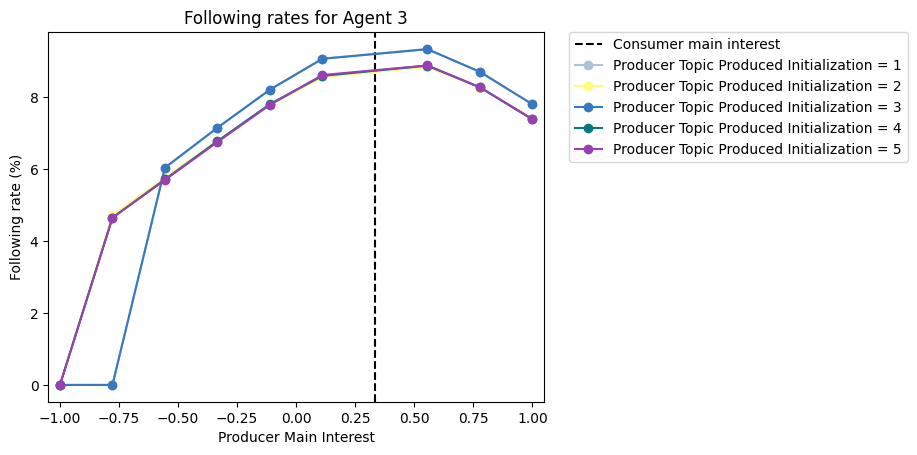

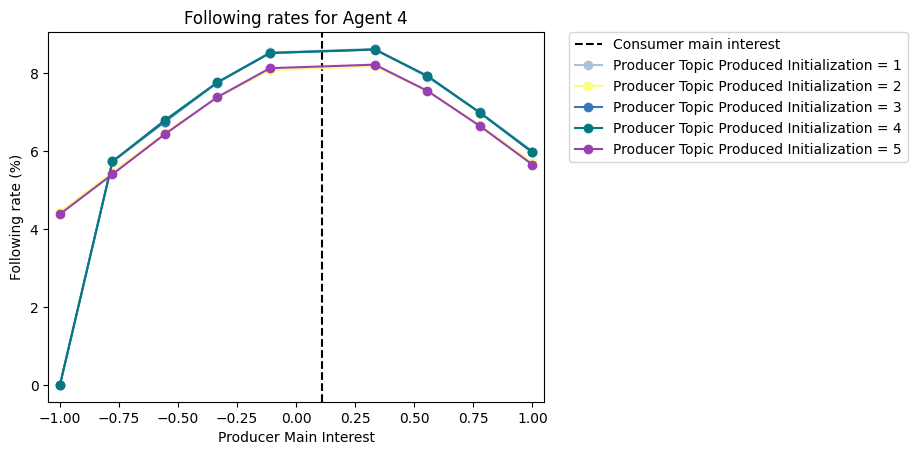

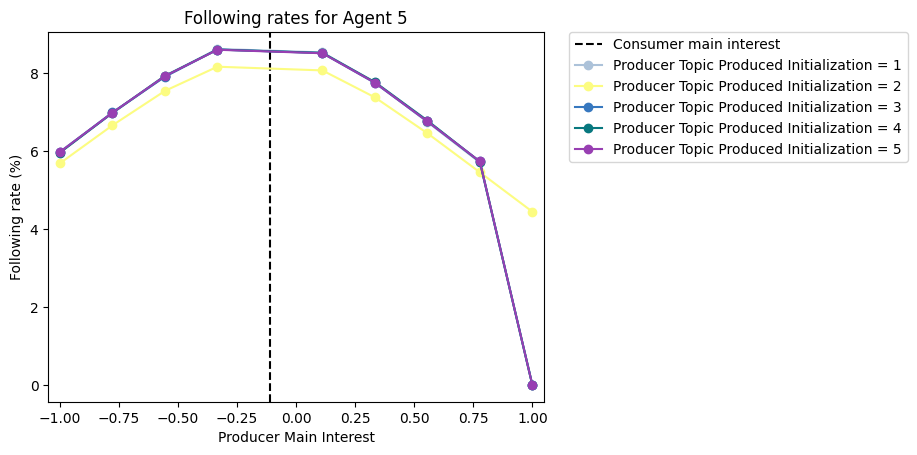

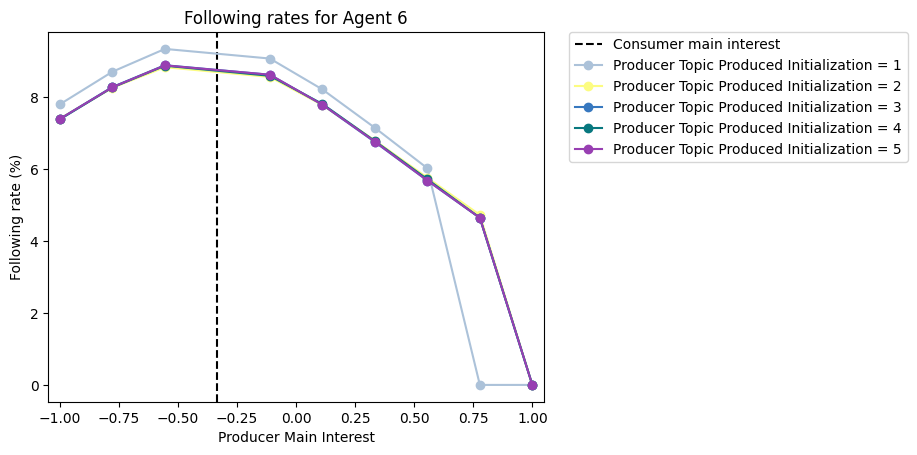

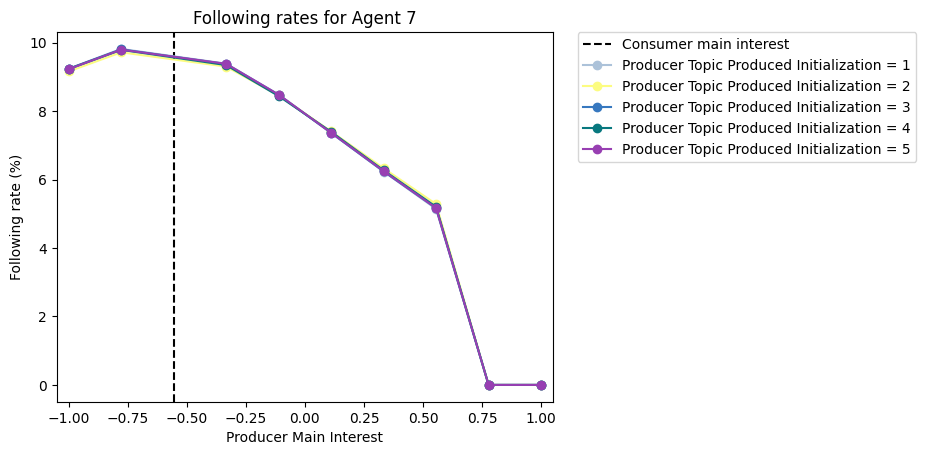

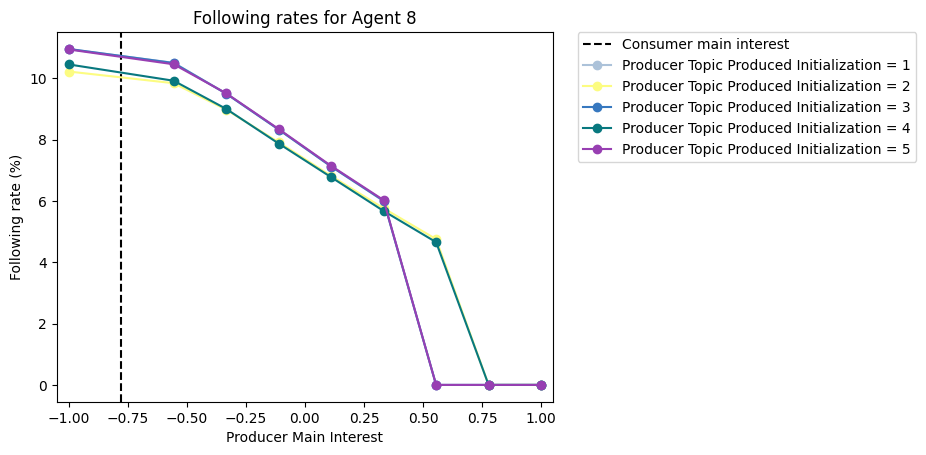

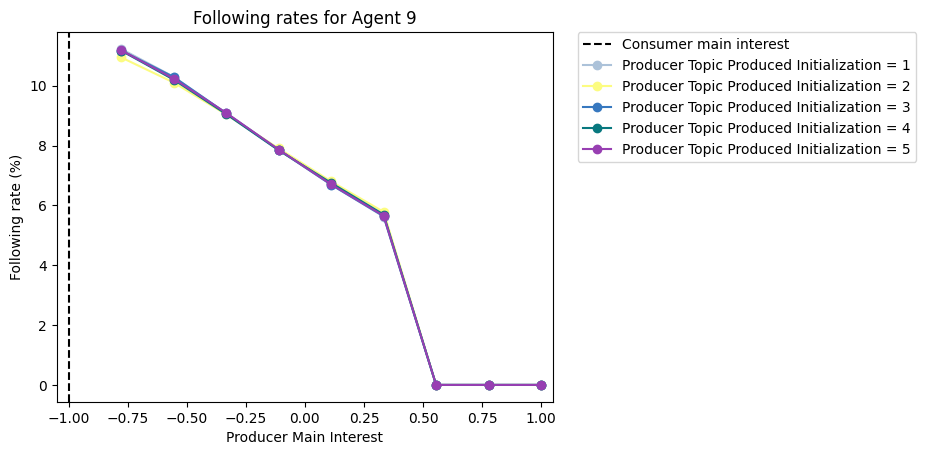

In [28]:
for i in range(num_agents):
    visualize.plot_agent_following_rates_by_test(i, [stat.consumer_stats for stat in perfect_info_stats], varied_param_legend_label, varied_param_values)

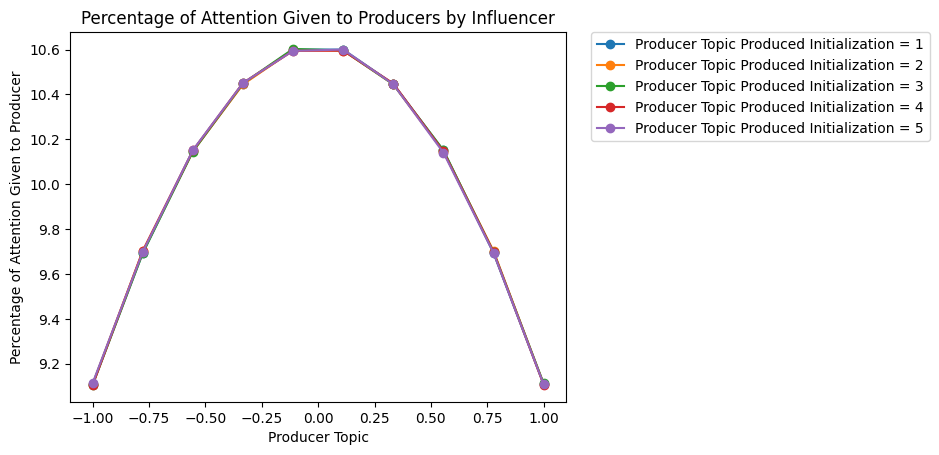

In [29]:
for val, stat in zip(varied_param_values, perfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / influencer.attention_bound * 100) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Percentage of Attention Given to Producers by Influencer")
plt.xlabel("Producer Topic")
plt.ylabel("Percentage of Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

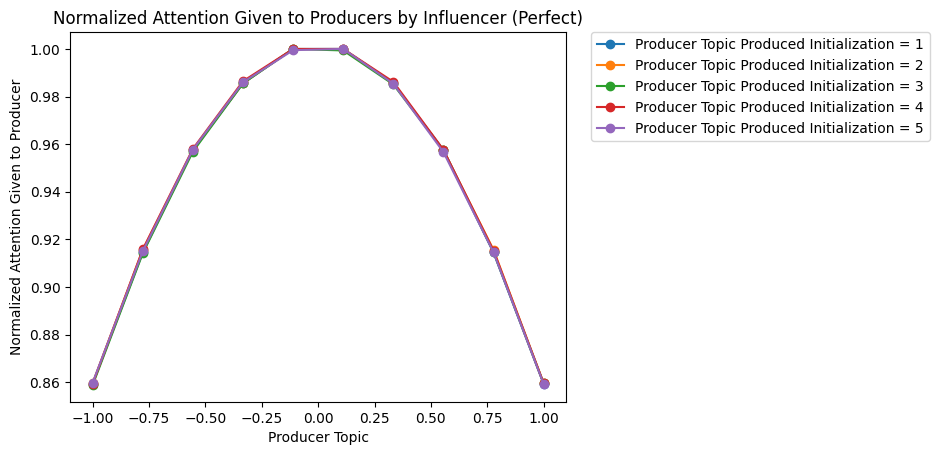

In [30]:
for val, stat in zip(varied_param_values, perfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    min_rate = min(following_rates)
    max_rate = max(following_rates)
    following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index]) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Normalized Attention Given to Producers by Influencer (Perfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Normalized Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()